In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import cluster, neighbors, svm, metrics, preprocessing
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv('Churn_Modelling.csv', delimiter=",")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

#removendo colunas desnecessárias (nº do cliente e outras indicadas na descrição do dataset)

In [4]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
balancePerSalary = df['Balance']/df['EstimatedSalary']
balancePerSalary

0       0.000000
1       0.744677
2       1.401375
3       0.000000
4       1.587055
          ...   
9995    0.000000
9996    0.564108
9997    0.000000
9998    0.808230
9999    3.407702
Length: 10000, dtype: float64

In [6]:
df['BalancePerSalary'] = balancePerSalary
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalancePerSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.000000
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.564108
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.000000
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.808230


In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalancePerSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,3.878703
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,108.337260
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.747002
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.514022
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,10614.655440


(array([7963.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2037.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

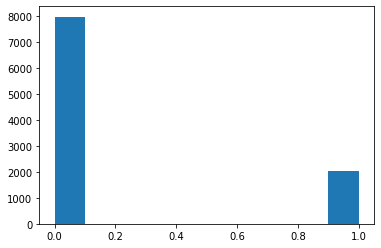

In [8]:
plt.hist(df["Exited"])

In [9]:
target = df['Exited']
samples = df.drop(columns=['Exited'])

le = preprocessing.LabelEncoder() #transforma atributos qualitativos em quantitativos
for column in samples.columns:
    if samples[column].dtypes == 'object':
        samples[column] = le.fit_transform(samples[column])


scaler = preprocessing.MinMaxScaler()
names = samples.columns
d = scaler.fit_transform(samples)
samples = pd.DataFrame(d, columns=names) #df normalizado (todos os dados no intervalo [0,1])

samples

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalancePerSalary
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,0.000000
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.000070
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,0.000132
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.000000
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.000150
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.000000
9996,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.000053
9997,0.718,0.0,0.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,0.000000
9998,0.844,0.5,1.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,0.000076


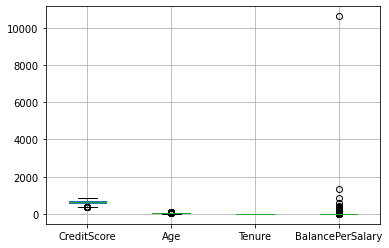

In [10]:
boxplot = df.boxplot(column=["CreditScore", "Age","Tenure", "BalancePerSalary"])

In [11]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalancePerSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.000000
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.564108
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.000000
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.808230


In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

X = samples.values
y = target.values

skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

for train_index, test_index in skf.split(X,y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	dt1 = DecisionTreeClassifier(random_state=1)
	dt1.fit(X_train, y_train)
	resultDT1 = dt1.predict(X_test)

	dt2 = DecisionTreeClassifier(min_samples_leaf=3)
	dt2.fit(X_train, y_train)
	resultDT2 = dt2.predict(X_test)

	dt3 = DecisionTreeClassifier(max_features=5)
	dt3.fit(X_train, y_train)
	resultDT3 = dt3.predict(X_test)

	svm1 = SVC(C=1, gamma='scale') # variar estes params
	svm1.fit(X_train, y_train)
	resultSVM1 = svm1.predict(X_test)

	svm2 = SVC(C=0.5, gamma='scale') # variar estes params
	svm2.fit(X_train, y_train)
	resultSVM2 = svm2.predict(X_test)

	svm3 = SVC(C=1, gamma='auto') # variar estes params
	svm3.fit(X_train, y_train)
	resultSVM3 = svm3.predict(X_test)

	for result in [resultDT1, resultDT2, resultDT3, resultSVM1, resultSVM2, resultSVM3]:
		print(metrics.accuracy_score(y_test, result))
		print(metrics.confusion_matrix(y_test, result))

	


0.769
[[671 125]
 [106  98]]
0.791
[[696 100]
 [109  95]]
0.786
[[687 109]
 [105  99]]
0.837
[[781  15]
 [148  56]]
0.831
[[787   9]
 [160  44]]
0.796
[[796   0]
 [204   0]]
0.78
[[685 111]
 [109  95]]
0.795
[[696 100]
 [105  99]]
0.785
[[675 121]
 [ 94 110]]
0.85
[[783  13]
 [137  67]]
0.83
[[789   7]
 [163  41]]
0.796
[[796   0]
 [204   0]]
0.779
[[683 113]
 [108  96]]
0.787
[[695 101]
 [112  92]]
0.795
[[701  95]
 [110  94]]
0.842
[[781  15]
 [143  61]]
0.832
[[788   8]
 [160  44]]
0.796
[[796   0]
 [204   0]]
0.794
[[696 100]
 [106  98]]
0.798
[[691 105]
 [ 97 107]]
0.803
[[689 107]
 [ 90 114]]
0.85
[[782  14]
 [136  68]]
0.836
[[788   8]
 [156  48]]
0.796
[[796   0]
 [204   0]]
0.805
[[702  94]
 [101 103]]
0.815
[[709  87]
 [ 98 106]]
0.783
[[684 112]
 [105  99]]
0.847
[[784  12]
 [141  63]]
0.84
[[791   5]
 [155  49]]
0.796
[[796   0]
 [204   0]]
0.793
[[679 117]
 [ 90 114]]
0.822
[[708  88]
 [ 90 114]]
0.793
[[691 105]
 [102 102]]
0.86
[[782  14]
 [126  78]]
0.845
[[788   8]
 [1

In [13]:
print("Acurácia: %0.2f" % (metrics.accuracy_score(testTarget, resultCLF)))
print("Precisão Média: %0.2f" % (metrics.average_precision_score(testTarget, resultCLF)))
print("Brier Score Loss: %0.2f" % (metrics.brier_score_loss(testTarget, resultCLF)))

matrizConfusao = metrics.confusion_matrix(testTarget, resultCLF)
print("Matriz de Confusão:\n",matrizConfusao)

NameError: name 'testTarget' is not defined

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3)
clf.fit(trainSample.values, trainTarget.values)
resultCLF = clf.predict(testSample.values)
print("Acurácia: %0.2f" % (metrics.accuracy_score(testTarget, resultCLF)))
print("Precisão Média: %0.2f" % (metrics.average_precision_score(testTarget, resultCLF)))
print("Brier Score Loss: %0.2f" % (metrics.brier_score_loss(testTarget, resultCLF)))

matrizConfusao = metrics.confusion_matrix(testTarget, resultCLF)
print("Matriz de Confusão:\n",matrizConfusao)

Acurácia: 0.81
Precisão Média: 0.36
Brier Score Loss: 0.19
Matriz de Confusão:
 [[1412  190]
 [ 198  200]]


In [ ]:
clf = DecisionTreeClassifier(max_features=5)
clf.fit(trainSample.values, trainTarget.values)
resultCLF = clf.predict(testSample.values)
print("Acurácia: %0.2f" % (metrics.accuracy_score(testTarget, resultCLF)))
print("Precisão Média: %0.2f" % (metrics.average_precision_score(testTarget, resultCLF)))
print("Brier Score Loss: %0.2f" % (metrics.brier_score_loss(testTarget, resultCLF)))

matrizConfusao = metrics.confusion_matrix(testTarget, resultCLF)
print("Matriz de Confusão:\n",matrizConfusao)

Acurácia: 0.80
Precisão Média: 0.37
Brier Score Loss: 0.20
Matriz de Confusão:
 [[1381  221]
 [ 175  223]]


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB()
clf.fit(trainSample.values, trainTarget.values)
resultCLF = clf.predict(testSample.values)

In [ ]:
print("Acurácia: %0.2f" % (metrics.accuracy_score(testTarget, resultCLF)))
print("Precisão Média: %0.2f" % (metrics.average_precision_score(testTarget, resultCLF)))
print("Brier Score Loss: %0.2f" % (metrics.brier_score_loss(testTarget, resultCLF)))

matrizConfusao = metrics.confusion_matrix(testTarget, resultCLF)
print("Matriz de Confusão:\n",matrizConfusao)

Acurácia: 0.81
Precisão Média: 0.22
Brier Score Loss: 0.19
Matriz de Confusão:
 [[1593    9]
 [ 378   20]]


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [ ]:
clf = SVC(C=0.5, gamma='scale') # variar estes params
clf.fit(trainSample.values, trainTarget.values)
resultCLF = clf.predict(testSample.values)

In [ ]:
print("Acurácia: %0.2f" % (metrics.accuracy_score(testTarget, resultCLF)))
print("Precisão Média: %0.2f" % (metrics.average_precision_score(testTarget, resultCLF)))
print("Brier Score Loss: %0.2f" % (metrics.brier_score_loss(testTarget, resultCLF)))

matrizConfusao = metrics.confusion_matrix(testTarget, resultCLF)
print("Matriz de Confusão:\n",matrizConfusao)

Acurácia: 0.84
Precisão Média: 0.34
Brier Score Loss: 0.16
Matriz de Confusão:
 [[1590   12]
 [ 314   84]]


In [ ]:
'''skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

for train_index, test_index in skf.split(X,y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	clf1 = tree.DecisionTreeClassifier(random_state=1)
	clf1.fit(X_train, y_train)
	result1 = clf1.predict(X_test)

	clf2 = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=1)
	clf2.fit(X,y)
	result2 = clf2.predict(X_test)

	print(metrics.accuracy_score(y_test, result1), 
				metrics.accuracy_score(y_test, result2))

	print(confusion_matrix(y_test, result1))
	print(confusion_matrix(y_test, result2))'''